In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sukuriame duomenų lentelę
data = {
    "Formatas": ["CSV", "Parquet", "XLSX", "JSON", "HDF5", "Feather", "SQL"],
    "Įrašymo greitis (eil./s)": [100000, 200000, 10000, 50000, 300000, 500000, 50000],
    "Skaitymo greitis (eil./s)": [150000, 250000, 15000, 60000, 500000, 700000, 100000],
    "Failo dydis (MB)": [100, 20, 150, 120, 50, 25, 80],  # SQL dydis apskaičiuotas (~80 MB)
    "Pastabos": [
        "Lengvai skaitomas, bet dideli failai.",
        "Labai geras suspaudimas, tinka dideliems rinkiniams.",
        "Lėtas, bet naudingas vartotojams su Excel įrankiais.",
        "Didesnis failas dėl sudėtingos struktūros.",
        "Greitas, bet reikalauja specialių įrankių.",
        "Itin greitas, bet ne žmogui skaitomas.",
        "Leidžia papildomas užklausų galimybes.",
    ],
}

# Sukuriame Pandas DataFrame
df = pd.DataFrame(data)

# Normalizuojame kriterijus į procentus nuo didžiausios jų reikšmės
df["Įrašymo greitis (%)"] = df["Įrašymo greitis (eil./s)"] / df["Įrašymo greitis (eil./s)"].max() * 100
df["Skaitymo greitis (%)"] = df["Skaitymo greitis (eil./s)"] / df["Skaitymo greitis (eil./s)"].max() * 100

# Konvertuojame failo dydį į atvirkštinį (gerumo skalė: didesnė reikšmė = geriau)
df["Failo taupumas"] = 1 / df["Failo dydis (MB)"]
df["Failo taupumas (%)"] = df["Failo taupumas"] / df["Failo taupumas"].max() * 100

# Apskaičiuojame rangus
df["Įrašymo greitis (rangas)"] = df["Įrašymo greitis (eil./s)"].rank(ascending=False)
df["Skaitymo greitis (rangas)"] = df["Skaitymo greitis (eil./s)"].rank(ascending=False)
df["Failo dydis (rangas)"] = df["Failo taupumas"].rank(ascending=False)

# Apskaičiuojame rangų sumą ir išrikiuojame eiles
df["Rangų suma"] = (
    df["Įrašymo greitis (rangas)"]
    + df["Skaitymo greitis (rangas)"]
    + df["Failo dydis (rangas)"]
)
df = df.sort_values("Rangų suma")

rank_max=df["Rangų suma"].max()
rank_min=df["Rangų suma"].min()

df["Teigiamas rangas"] = (rank_max-df["Rangų suma"])/(rank_max-rank_min)*100

# Lentelės rodymas konsolėje
print(df[["Formatas", "Įrašymo greitis (eil./s)", "Skaitymo greitis (eil./s)", "Failo dydis (MB)","Teigiamas rangas"]])

  Formatas  Įrašymo greitis (eil./s)  Skaitymo greitis (eil./s)  \
5  Feather                    500000                     700000   
1  Parquet                    200000                     250000   
4     HDF5                    300000                     500000   
0      CSV                    100000                     150000   
6      SQL                     50000                     100000   
3     JSON                     50000                      60000   
2     XLSX                     10000                      15000   

   Failo dydis (MB)  Teigiamas rangas  
5                25        100.000000  
1                20         82.352941  
4                50         82.352941  
0               100         47.058824  
6                80         38.235294  
3               120         20.588235  
2               150          0.000000  


In [50]:
df[["Formatas", "Teigiamas rangas", "Pastabos"]].style

,Formatas,Teigiamas rangas,Pastabos
5,Feather,100.000000,"Itin greitas, bet ne žmogui skaitomas."
1,Parquet,82.352941,"Labai geras suspaudimas, tinka dideliems rinkiniams."
4,HDF5,82.352941,"Greitas, bet reikalauja specialių įrankių."
0,CSV,47.058824,"Lengvai skaitomas, bet dideli failai."
6,SQL,38.235294,Leidžia papildomas užklausų galimybes.
3,JSON,20.588235,Didesnis failas dėl sudėtingos struktūros.
2,XLSX,0.000000,"Lėtas, bet naudingas vartotojams su Excel įrankiais."


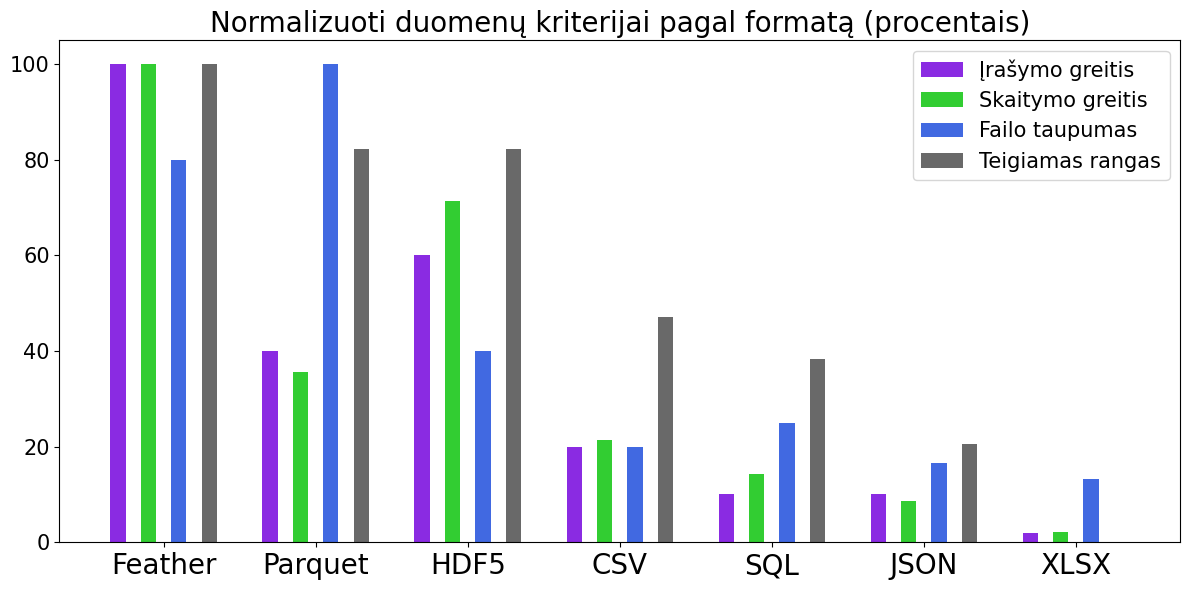

In [54]:
# Sukuriame stulpelinę diagramą
x = np.arange(len(df["Formatas"]))  # Formatų indeksai
width = 0.1  # Stulpelio plotis

plt.figure(figsize=(12, 6))
plt.bar(x-3*width, df["Įrašymo greitis (%)"], width, label="Įrašymo greitis", color="blueviolet")
plt.bar(x-width,   df["Skaitymo greitis (%)"], width, label="Skaitymo greitis", color="limegreen")
plt.bar(x+width,   df["Failo taupumas (%)"], width, label="Failo taupumas", color="royalblue")
plt.bar(x+3*width, df["Teigiamas rangas"], width, label="Teigiamas rangas", color="dimgray")

# Diagramos parametrai
plt.title("Normalizuoti duomenų kriterijai pagal formatą (procentais)",fontsize=20)
# plt.xlabel("Formatas")
plt.xticks(x, df["Formatas"], rotation=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

# Išsaugome ir parodome diagramą
plt.savefig("normalizuoti_formatu_duomenys.png")
plt.show()


In [ ]:
# https://www.geeksforgeeks.org/how-to-set-tick-labels-font-size-in-matplotlib/
# https://matplotlib.org/3.1.1/gallery/color/named_colors.html